# Tutorial: Principal Component Analysis Using the Eigendecomposition of the Covariance Matrix: 

Recall that the iris data consists of four measurements for each flower species: petal length (pl), petal width (pw), 
sepal length (sl), and sepal width (sw).

In [1]:
def cov(u,v):
    N=len(u)
    onevec=vector(ones_matrix(QQ, 1,N))
    cov=(u-mean(u)*onevec).dot_product(v-mean(v)*onevec)/(N-1)
    return cov
def vectors2matrix(vectors):
    return matrix(CDF,vectors).transpose()
def pretty(Q):
    print Q.str(rep_mapping=lambda x: 
    str(x.n(digits=3)))

In [2]:
import csv
reader = csv.reader(open('iris.data'))
data = [map(float, row[:-1]) for row in reader]
pl, pw, sl, sw = map(vector, zip(*data))

In [3]:
cov(pl,pw)

-0.03926845637583892

In [4]:
covariance=matrix(4,4,[cov(pl,pl),cov(pl,pw),cov(pl,sl),cov(pl,sw), cov(pw,pl),cov(pw,pw),cov(pw,sl),cov(pw,sw),cov(sl,pl),cov(sl,pw),cov(sl,sl),cov(sl,sw),cov(sw,pl),cov(sw,pw),cov(sl,sw),cov(sw,sw)])
pretty(covariance)

[  0.686 -0.0393    1.27   0.517]
[-0.0393   0.188  -0.322  -0.118]
[   1.27  -0.322    3.11    1.30]
[  0.517  -0.118    1.30   0.582]


In [5]:
eigen_info=covariance.eigenmatrix_right()

In [6]:
Q=eigen_info[1]
pretty(Q)

[  0.362  -0.657  -0.581   0.317]
[-0.0823  -0.730   0.596  -0.324]
[  0.857   0.176  0.0725  -0.480]
[  0.359  0.0747   0.549   0.751]


In [7]:
D=eigen_info[0]
pretty(D)

[  4.22  0.000  0.000  0.000]
[ 0.000  0.242  0.000  0.000]
[ 0.000  0.000 0.0785  0.000]
[ 0.000  0.000  0.000 0.0237]


In [8]:
eigenvalues=D.diagonal()
eigenvalues

[4.22484076832011,
 0.24224357162751525,
 0.07852390809415485,
 0.023683027126001843]

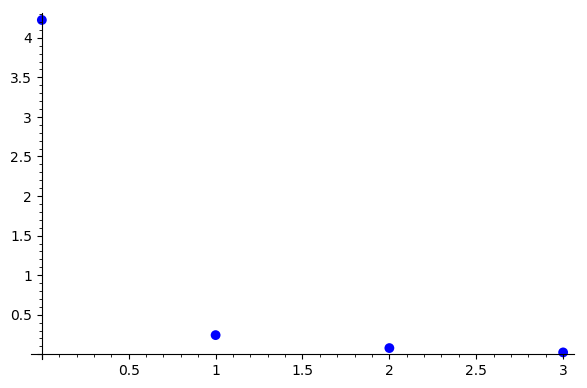

In [9]:
list_plot(eigenvalues,color='blue',pointsize=50)

In [10]:
pcts=vector(eigenvalues)/sum(eigenvalues)
pcts

(0.9246162071742682, 0.053015567850535024, 0.01718513952500686, 0.005183085450189912)

In [11]:
pcts[0:2]

(0.9246162071742682, 0.053015567850535024)

In [0]:
pcts=vector(eigenvalues)/sum(eigenvalues)
cum_pct=[sum(pcts[0:entry]) for entry in range(0,4)]
list_plot(cum_pct,color='red',pointsize=50,title='Pct of total variance in terms of number of retained components')

In [0]:
cum_pct

In [0]:
U=Q.matrix_from_columns([0,1])
pretty(U)

In [0]:
pretty(U.transpose())

In [0]:
X=vectors2matrix([pl,pw,sl,sw]).transpose()
X

In [0]:
(U.transpose()*X).str()

In [0]:
list_plot(U.transpose()*X, size=20, aspect_ratio=1)